In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filename='df_relevant.csv'
data=pd.read_csv(filename)
data.head(5)

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE
0,12346,1,4,4,144
1,12347,4,1,4,414
2,12348,2,3,4,234
3,12349,3,2,4,324
4,12350,1,3,2,132


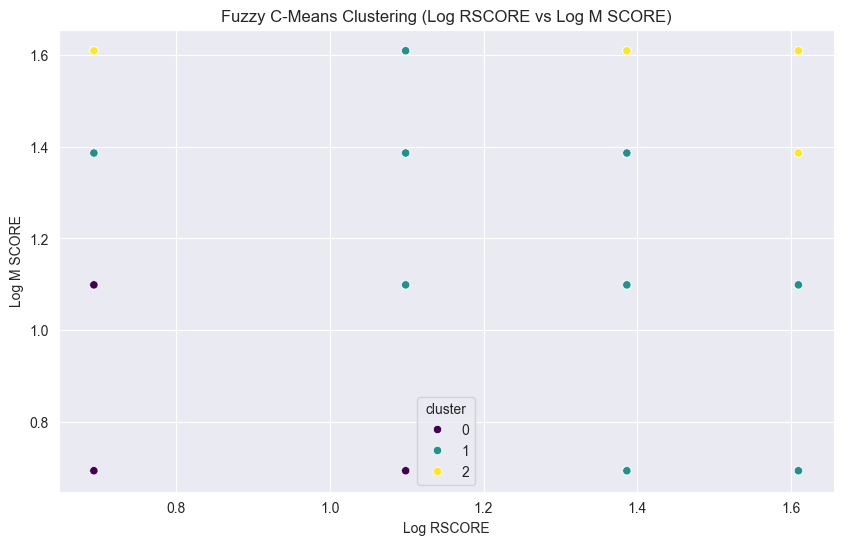

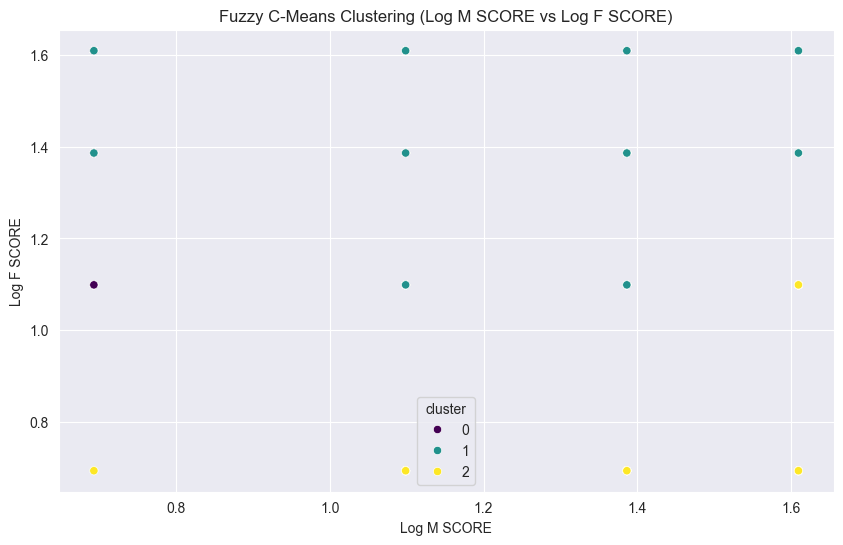

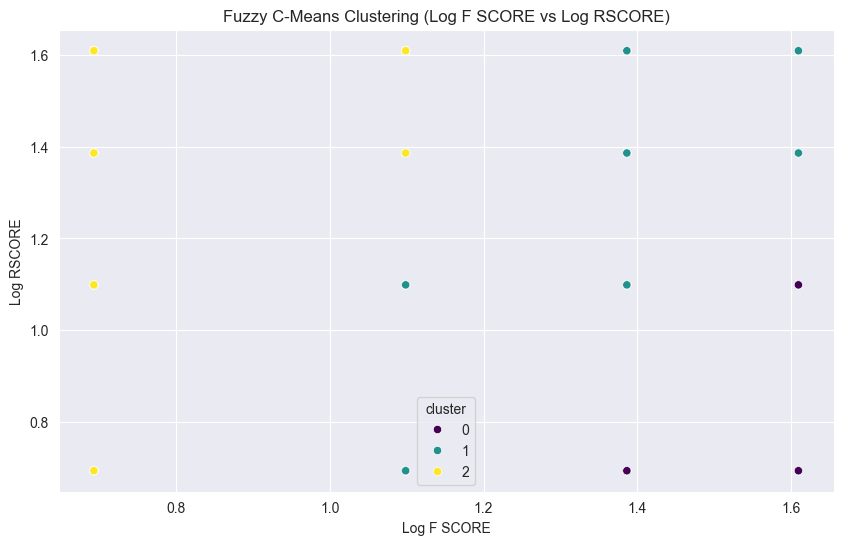

In [14]:
from fcmeans import FCM

# Load data
filename = 'df_relevant.csv'
data = pd.read_csv(filename)

# Relevant columns for clustering
features = ['RSCORE', 'M SCORE', 'F SCORE']

# Apply log transformation to the features
data_log = data.copy()
for feature in features:
    data_log[f'log_{feature}'] = np.log1p(data[feature])

# Use the log-transformed columns for clustering
log_features = [f'log_{feature}' for feature in features]
fcm = FCM(n_clusters=3, random_state=42)
fcm.fit(data_log[log_features].values)
data_log['cluster'] = fcm.predict(data_log[log_features].values)

# Visualize the clustering log_RSCORE vs log_M SCORE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_RSCORE', y='log_M SCORE', hue='cluster', data=data_log, palette='viridis')
plt.title('Fuzzy C-Means Clustering (Log RSCORE vs Log M SCORE)')
plt.xlabel('Log RSCORE')
plt.ylabel('Log M SCORE')
plt.show()

# Visualize the clustering log_M SCORE vs log_F SCORE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_M SCORE', y='log_F SCORE', hue='cluster', data=data_log, palette='viridis')
plt.title('Fuzzy C-Means Clustering (Log M SCORE vs Log F SCORE)')
plt.xlabel('Log M SCORE')
plt.ylabel('Log F SCORE')
plt.show()

# Visualize the clustering log_F SCORE vs log_RSCORE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_F SCORE', y='log_RSCORE', hue='cluster', data=data_log, palette='viridis')
plt.title('Fuzzy C-Means Clustering (Log F SCORE vs Log RSCORE)')
plt.xlabel('Log F SCORE')
plt.ylabel('Log RSCORE')
plt.show()


Silhouette Score: 0.3996752663395199


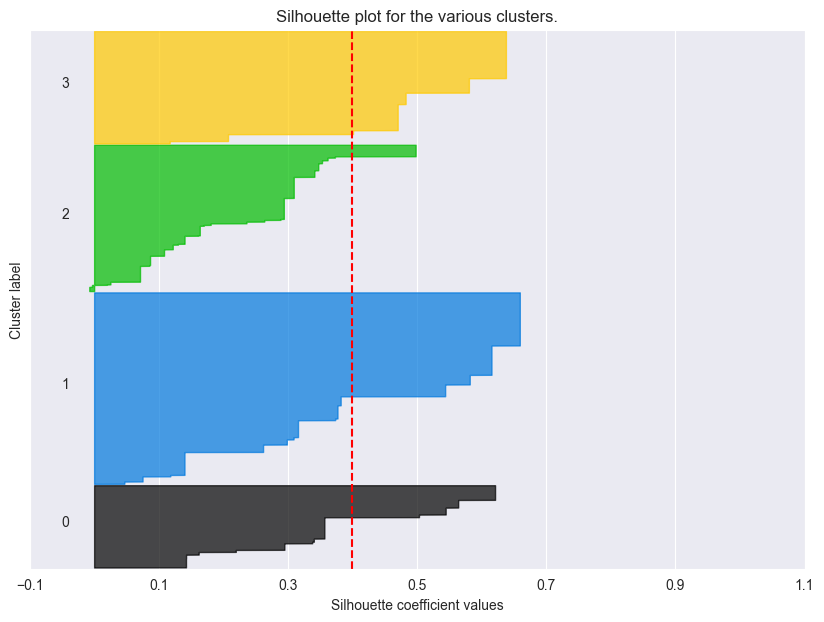

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
# Load data
filename = 'df_relevant.csv'
data = pd.read_csv(filename)

# Relevant columns for clustering
features = ['RSCORE', 'F SCORE', 'M SCORE']

# Apply log transformation to the features
data_log = data.copy()
for feature in features:
    data_log[f'log_{feature}'] = np.log1p(data[feature])

# Use the log-transformed columns for clustering
log_features = [f'log_{feature}' for feature in features]
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(data_log[log_features].values)

# Calculate silhouette scores
silhouette_avg = silhouette_score(data_log[log_features], labels)
sample_silhouette_values = silhouette_samples(data_log[log_features], labels)

print(f"Silhouette Score: {silhouette_avg}")

# Plot silhouette scores
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

# The silhouette coefficient can range from -1, 1 but in practice will be more compact
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(data_log) + (kmeans.n_clusters + 1) * 10])

y_lower = 10
for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / kmeans.n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for the various clusters.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()
